<a href="https://colab.research.google.com/github/vamshi12vamshi/project-/blob/main/nyc_taxi_trip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import datetime

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/nyc taxi trip/train.csv")

In [ ]:
data.shape

(1458644, 11)

.In the data we have 1458644 rows and 11 columns

In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


.**id** — a unique identifier for each trip

.**vendor_id** — a code indicating the provider associated with the trip record

.**pickup_datetime** — date and time when the meter was engaged

.**dropoff_datetime** — date and time when the meter was disengaged

.**passenger_count** — the number of passengers in the vehicle (driver entered value)

.**pickup_longitude** — the longitude where the meter was engaged

.**pickup_latitude** — the latitude where the meter was engaged

.**dropoff_longitude** — the longitude where the meter was disengaged


.**dropoff_latitude** — the latitude where the meter was disengaged


.**store_and_fwd_flag** — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.


In [ ]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

.We see that id has **1458644** unique values which are equal to the number of rows in our dataset.

.There are **2** unique  **vendor_id**.

.There are **10** unique **passenger counts**

.There are **2** unique values for **store_and_fwd_flag**, that we also saw in the description of the variables, which are Y and N.

In [ ]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Some insights from above summary

.**Vendor id** has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.

.**Passenger count** has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.

.

.Convert the **pickup_datetime** and **dropoff_datetime** datatype into datetime

In [ ]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [ ]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

**Extracting day_name and month number from the pickup_datetime and dropoff_datetime**

In [ ]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday


In [ ]:
data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [ ]:
data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday

In [ ]:
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,0,0,17,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,6,6,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,1,1,11,12
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,2,2,19,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,5,5,13,13


.**pickup_day** and **dropoff_day** which will contain the name of the day on which the ride was taken.

.**pickup_day_no** and **dropoff_day_no** which will contain the day number instead of characters with Monday=0 and Sunday=6.

.**pickup_hour** and **dropoff_hour** with an hour of the day in the 24-hour format.

.**pickup_month** and **dropoff_month** with month number with January=1 and December=12.




In [ ]:
data['pickup_day'].value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

.The **FRIDAY** ha more number of days because of most of the companies weekend is started from FRIDAY.

.The **MONDAY** has less number of days because the weekend will be ended and we have to go to work

In [ ]:
data['dropoff_day'].value_counts()

Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64

In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour'],
      dtype='object')

.As same **FRIDAY** has maxmimum number of droppoff days and **MONDAY** has less number of drop off days

**Further Analysis**

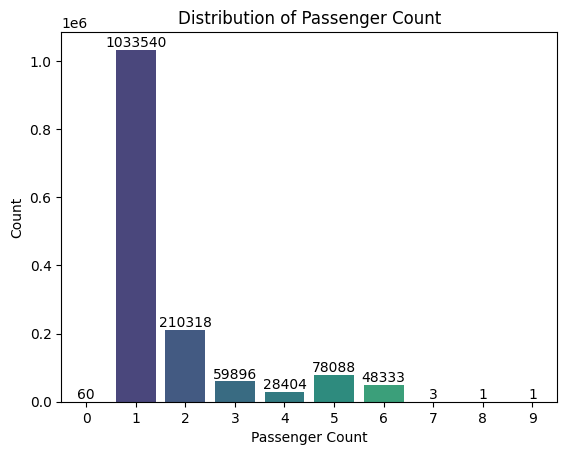

In [ ]:
# Count the frequency of each passenger count and sort in descending order
passenger_count_counts = data['passenger_count'].value_counts().reset_index()
passenger_count_counts.columns = ['Passenger Count', 'Count']
passenger_count_counts = passenger_count_counts.sort_values(by='Count', ascending=False)
# Create a countplot with sorted data
plot = sns.barplot(x='Passenger Count', y='Count', data=passenger_count_counts, palette='viridis')
# Set a title for the countplot
plt.title('Distribution of Passenger Count')

# Add annotations to display the count (height of each bar) on top of each bar
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()


**Trips Per Day**

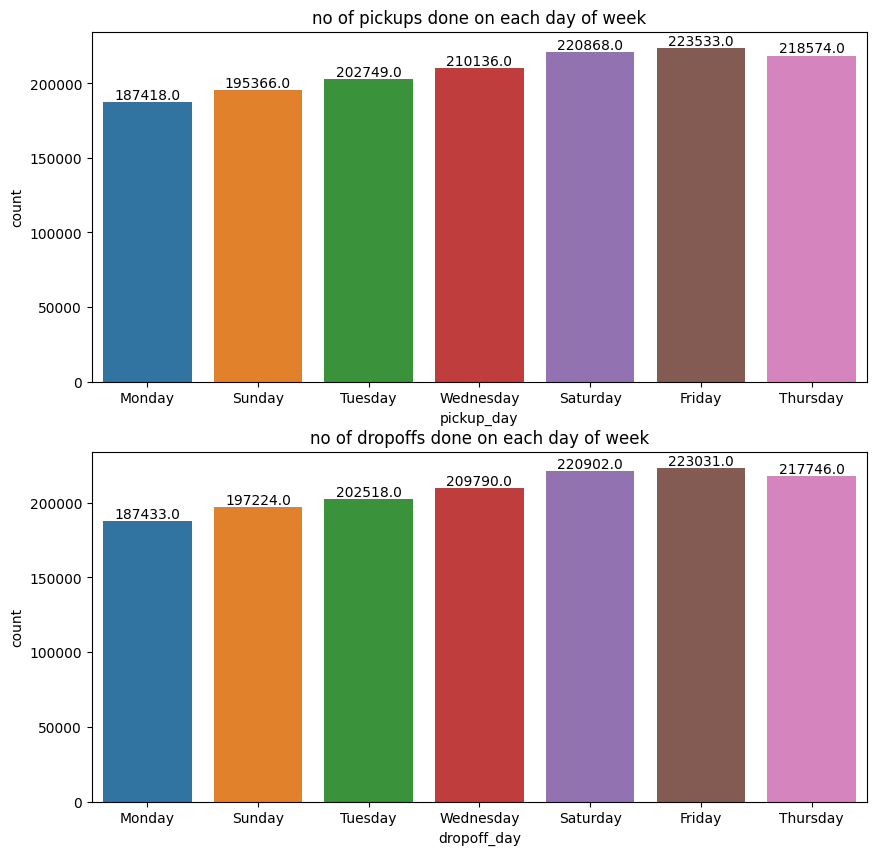

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=data,ax=ax[0])
ax[0].set_title('no of pickups done on each day of week')
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

sns.countplot(x='dropoff_day',data=data,ax=ax[1])
ax[1].set_title('no of dropoffs done on each day of week')
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')



**Trips Per Hour**

In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour'],
      dtype='object')

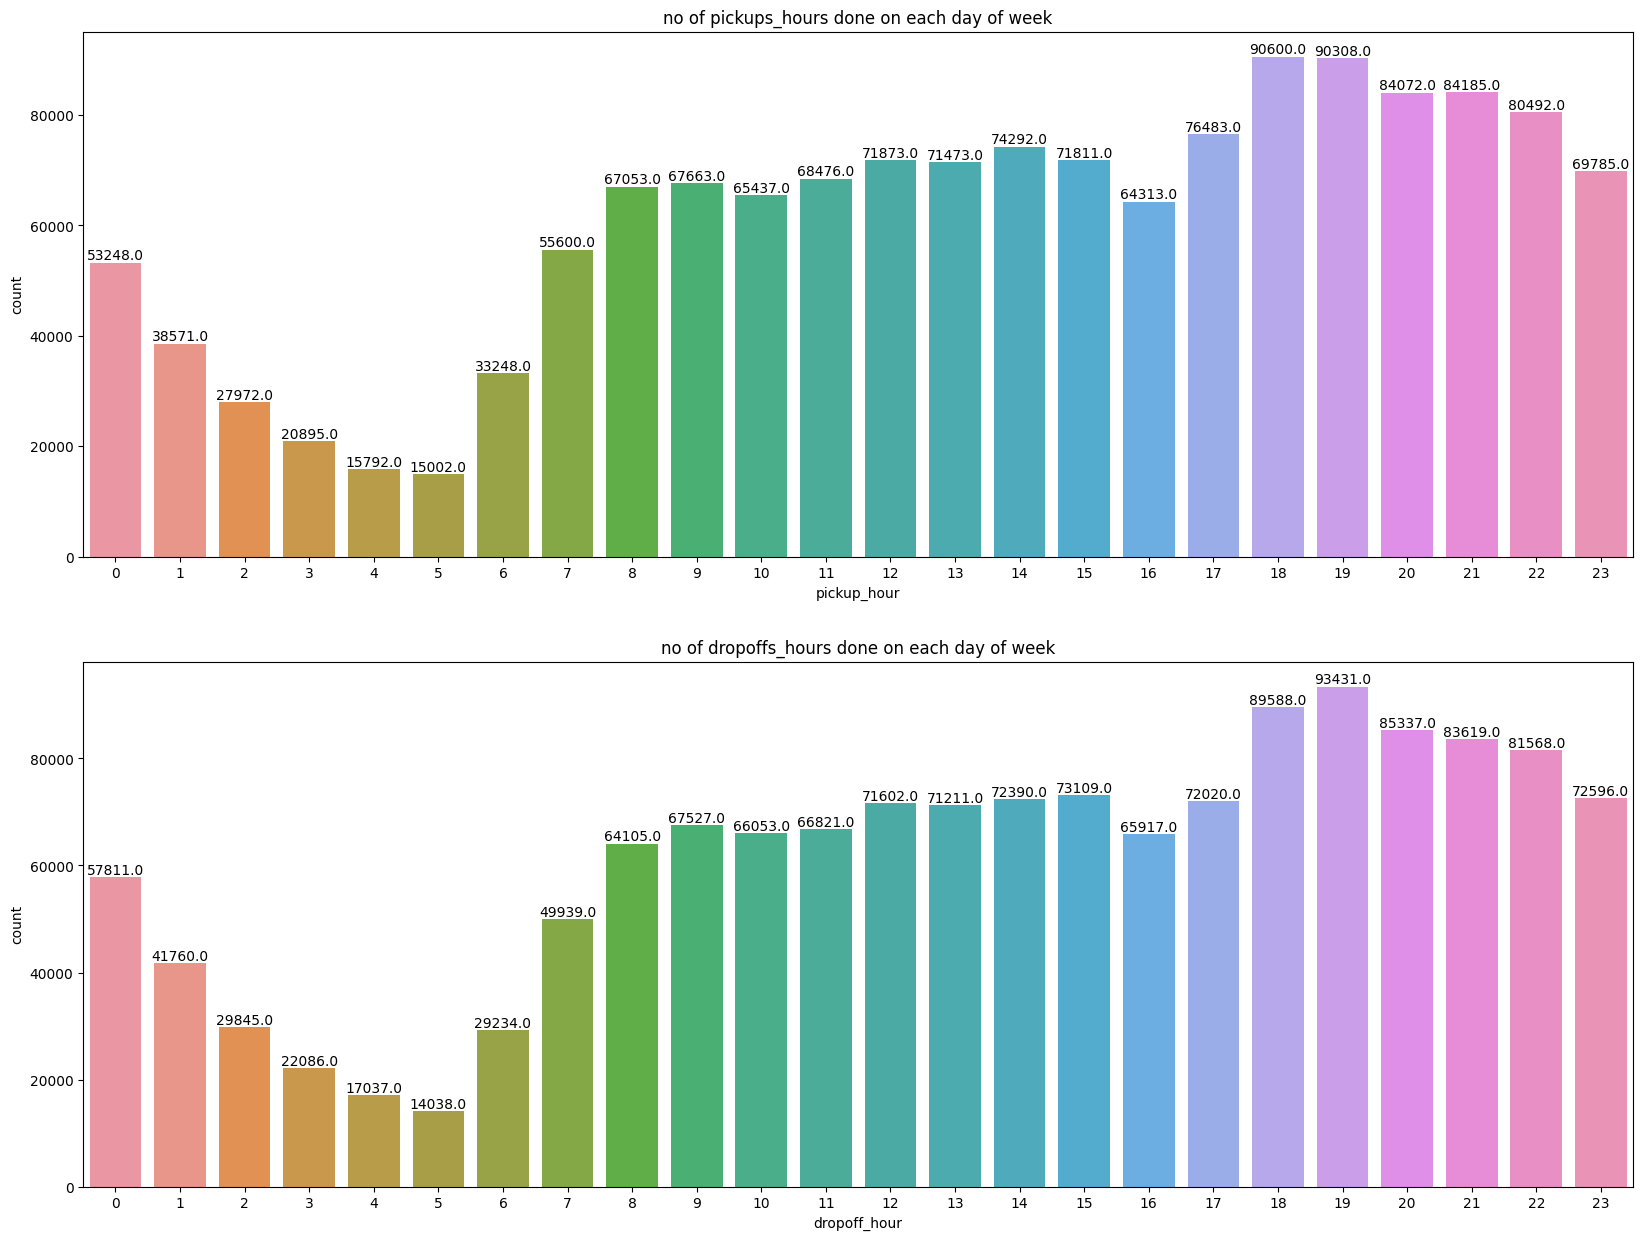

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(20,15))
sns.countplot(x='pickup_hour',data=data,ax=ax[0])
ax[0].set_title('no of pickups_hours done on each day of week')
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

sns.countplot(x='dropoff_hour',data=data,ax=ax[1])
ax[1].set_title('no of dropoffs_hours done on each day of week')
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')



In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour'],
      dtype='object')

We see the busiest hours are 6:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices

**Trips Time Of Day**

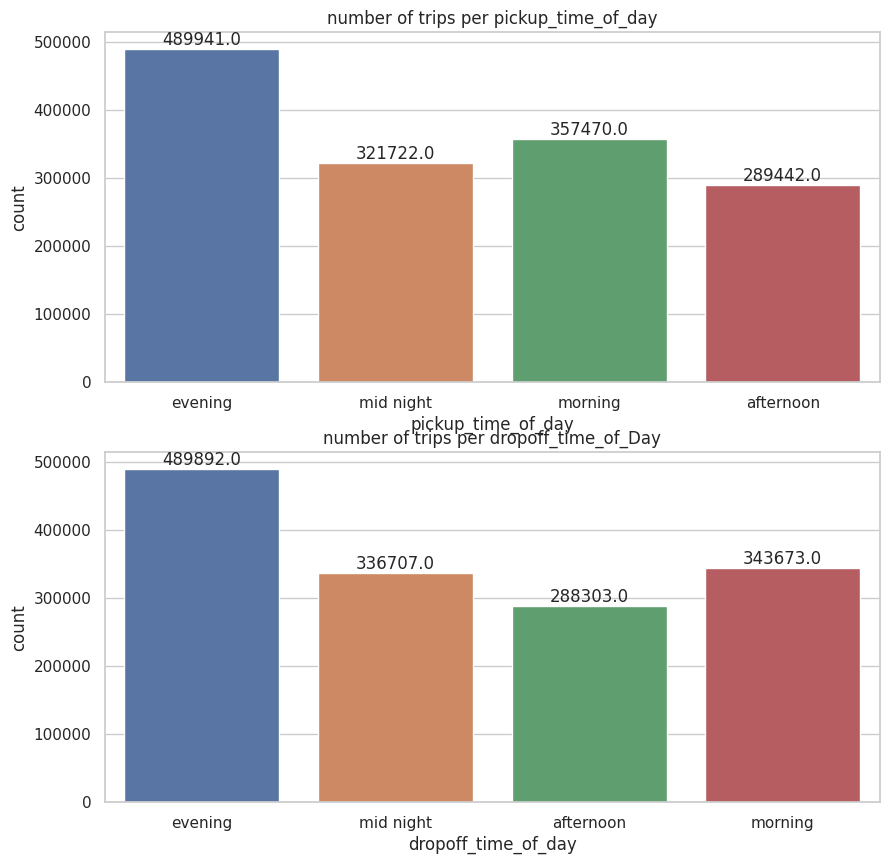

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_time_of_day',data=data,ax=ax[0])
ax[0].set_title("number of trips per pickup_time_of_day")
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
sns.countplot(x='dropoff_time_of_day',data=data,ax=ax[1])
ax[1].set_title("number of trips per dropoff_time_of_Day")
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

.As we see evenings are busiest hour

**Trips Per Month**

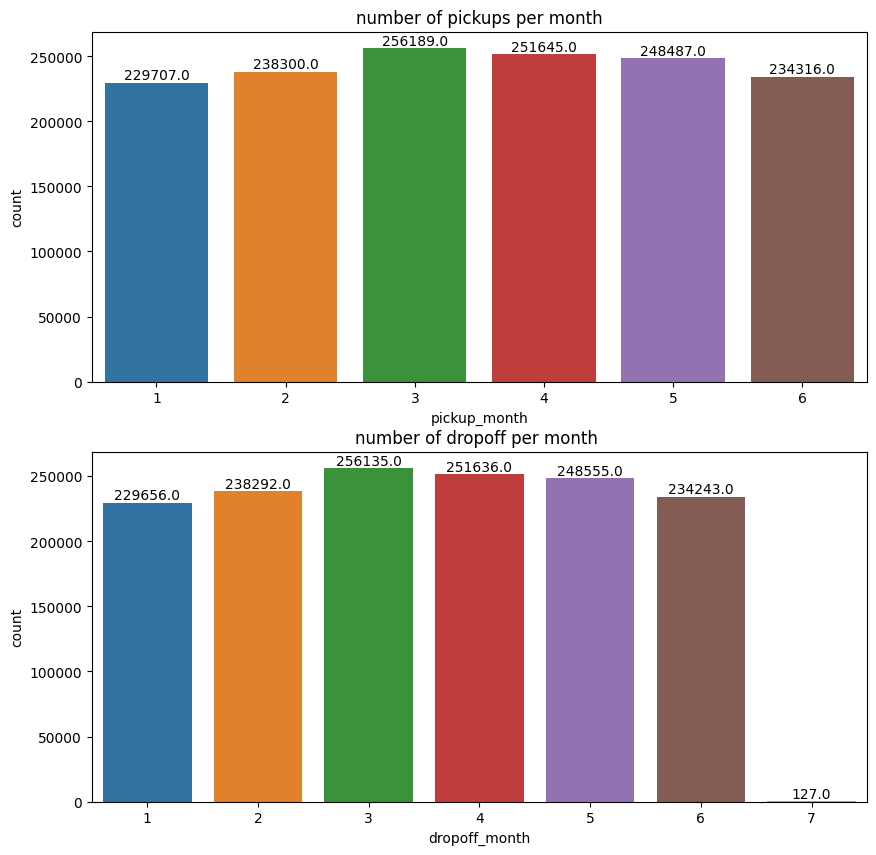

In [ ]:

fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_month',data=data,ax=ax[0])
ax[0].set_title("number of pickups per month")
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
sns.countplot(x='dropoff_month',data=data,ax=ax[1])
ax[1].set_title("number of dropoff per month ")
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

There is not much difference in the number of trips across months.

In [ ]:
def time_of_day(x):
  if x  in range(6,12):
    return 'morning'
  elif x in range(12,16):
    return 'afternoon'
  elif x in range(16,22):
    return 'evening'
  else:
    return 'mid night'

Next, I have defined a function that lets us determine what time of the day the ride was taken. I have created 4 time zones ‘Morning’ (from 6:00 am to 11:59 pm), ‘Afternoon’ (from 12 noon to 3:59 pm), ‘Evening’ (from 4:00 pm to 9:59 pm), and ‘Late Night’ (from 10:00 pm to 5:59 am)

In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour'],
      dtype='object')

In [ ]:
data['pickup_time_of_day']=data['pickup_hour'].apply(time_of_day)
data['dropoff_time_of_day']=data['dropoff_hour'].apply(time_of_day)


In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_time_of_day,dropoff_time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,Monday,3,3,0,0,17,17,evening,evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,Sunday,6,6,6,6,0,0,mid night,mid night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,Tuesday,1,1,1,1,11,12,morning,afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,Wednesday,4,4,2,2,19,19,evening,evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,Saturday,3,3,5,5,13,13,afternoon,afternoon


.By using longitudes and latitutdes we can extract from this is **distance**

In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_time_of_day', 'dropoff_time_of_day'],
      dtype='object')

In [ ]:
!pip install vincenty

  Preparing metadata (setup.py) ... done
  Created wheel for vincenty: filename=vincenty-0.1.4-py3-none-any.whl size=3067 sha256=c7d3d2574f19a75629bacb4b88240d86fdbe53c375e0199ef0ed4202d179464a
  Stored in directory: /root/.cache/pip/wheels/3b/53/d4/c562486723d1637dd35e7e25a2357831069e73d04ef692e638
Successfully built vincenty


In [ ]:
#importing the library to calculate distance

from geopy.distance import geodesic
def cal_distance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):
    start_coordinates = (pickup_latitude, pickup_longitude)
    stop_coordinates = (dropoff_latitude, dropoff_longitude)

    return geodesic(start_coordinates, stop_coordinates).kilometers


In [ ]:
data['distance'] = data.apply(lambda x:cal_distance(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis=1)


In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_time_of_day,dropoff_time_of_day,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,3,3,0,0,17,17,evening,evening,1.502172
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,6,6,6,6,0,0,mid night,mid night,1.808660
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,1,1,1,1,11,12,morning,afternoon,6.379687
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,4,4,2,2,19,19,evening,evening,1.483632
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,3,3,5,5,13,13,afternoon,afternoon,1.187038


**Univariate anlaysis**

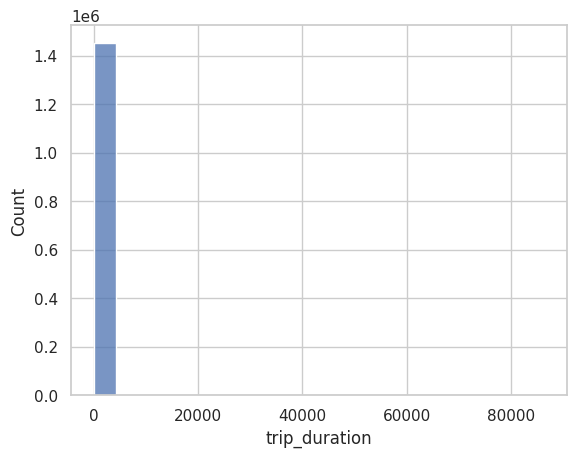

In [ ]:
#target variable
sns.histplot(data['trip_duration'],kde=False,bins=20)
plt.show()

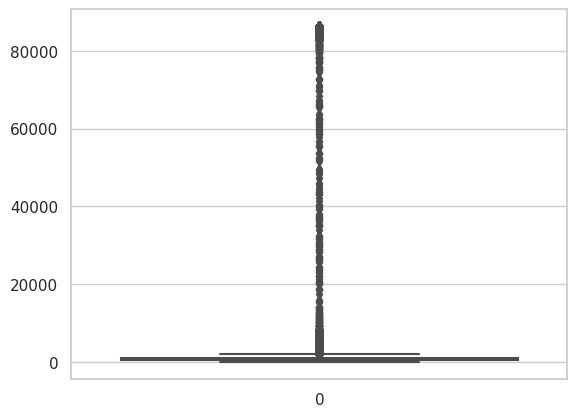

In [ ]:
sns.boxplot(data['trip_duration'])
plt.show()

In [ ]:
data['trip_duration'].sort_values(ascending=False)

1234291    86392
295382     86391
73816      86390
59891      86387
1360439    86385
           ...  
207497         1
726971         1
761666         1
35196          1
1125014        1
Name: trip_duration, Length: 1458575, dtype: int64

.So we can see some values which significantly different from others.

AS there are only some outliers we can drop those outliers.

In [ ]:
data.drop(data[data['trip_duration']==3526282].index,inplace=True)
data.drop(data[data['trip_duration']==2227612].index,inplace=True)
data.drop(data[data['trip_duration']==2049578].index,inplace=True)
data.drop(data[data['trip_duration']==1939736].index,inplace=True)

In [ ]:
data['trip_duration'].sort_values(ascending=False)

1234291    86392
295382     86391
73816      86390
59891      86387
1360439    86385
           ...  
207497         1
726971         1
761666         1
35196          1
1125014        1
Name: trip_duration, Length: 1458575, dtype: int64

**Vendors**

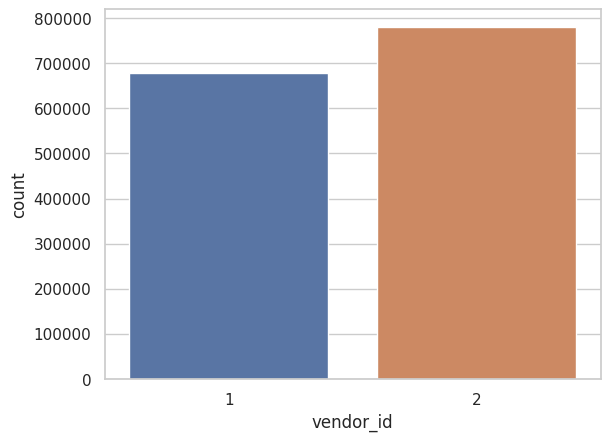

In [ ]:
sns.countplot(x='vendor_id',data=data)
plt.show()

There is no much difference between trips taken by vendors

**Passenger Count**

In [ ]:
data['passenger_count'].value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

.There are some trips with have 0 passengers count.

.There are 1 trips with having 9,8 passengers.

.we see the highes number of trips with having 1 passengers.

.Let us remove with having 0,7,8,9 passengers count

In [ ]:
data['passenger_count'].unique()

array([1, 6, 4, 2, 3, 5])

In [ ]:
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

In [ ]:
data['passenger_count'].value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

**Store and Forward Flag**

In [ ]:
data['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994486
Y    0.005514
Name: store_and_fwd_flag, dtype: float64

We see there are less than 1% of trips that were stored before forwarding

In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_time_of_day', 'dropoff_time_of_day',
       'distance'],
      dtype='object')

**Bivariate Analysis**

**.Trip duration per vendor**

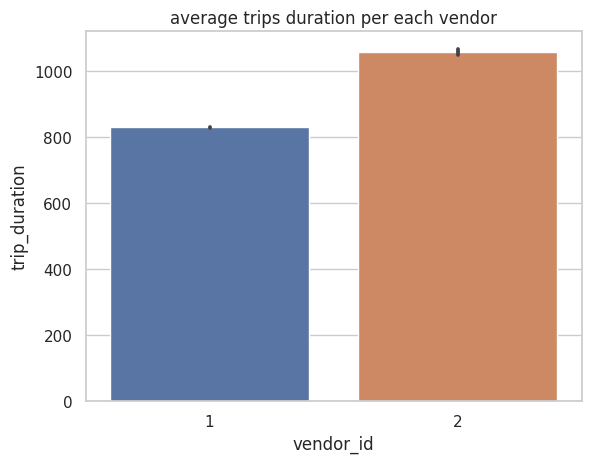

In [ ]:

sns.barplot(y='trip_duration',x='vendor_id',data=data)
plt.title("average trips duration per each vendor")
plt.show()


.Vendor 2 takes longer trips compares to Vendor1

**Trip duration per store_and_fwd_flag**

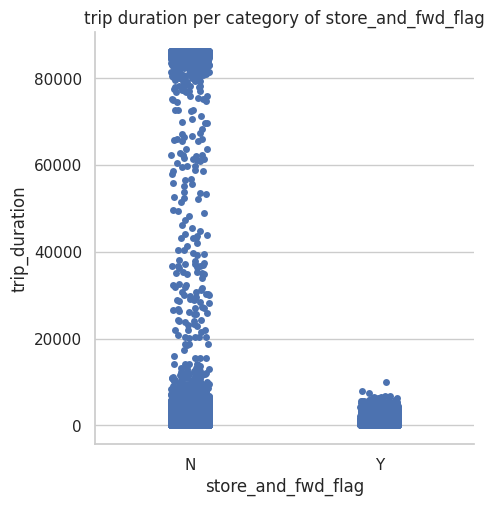

In [ ]:

sns.catplot(x='store_and_fwd_flag',y='trip_duration',data=data,kind='strip')
plt.title("trip duration per category of store_and_fwd_flag")
plt.show()

Trip duration is generally longer for trips whose flag was not stored.



**Trip duration per hour**

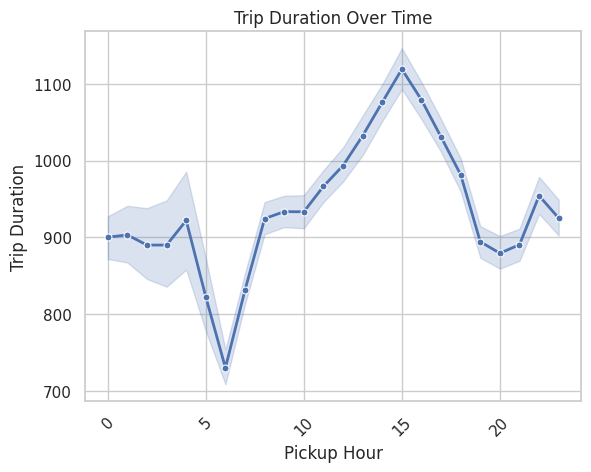

In [ ]:
sns.set(style="whitegrid")
ax = sns.lineplot(x='pickup_hour', y='trip_duration', data=data, marker='o', markersize=5, color='b', linewidth=2)
plt.xlabel('Pickup Hour')
plt.ylabel('Trip Duration')
plt.title('Trip Duration Over Time')
plt.xticks(rotation=45)
plt.grid(True)



plt.show()









































































.As we see that trip duration is maximum around 3pm which may be because traffic is busy and trip duration is minimum is around 7am because traffic may not busy




**.Trip duration per week**

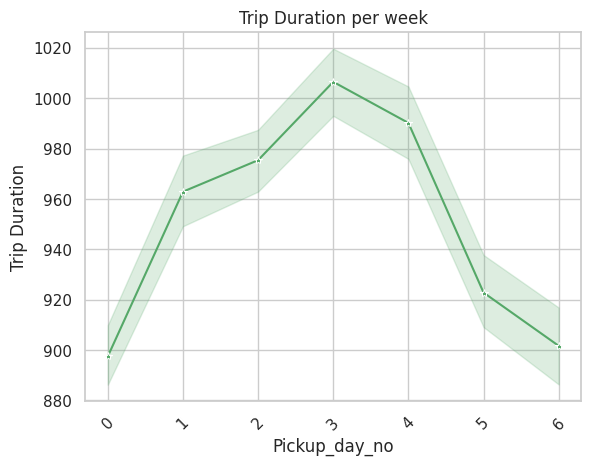

In [ ]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=data,marker='*',color='g')
plt.xlabel('Pickup_day_no')
plt.ylabel('Trip Duration')
plt.title('Trip Duration per week')
plt.xticks(rotation=45)
plt.grid(True)



plt.show()




.Trip duration is longest on Thursday followed by Friday

In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_time_of_day', 'dropoff_time_of_day',
       'distance'],
      dtype='object')

**Trip duration per month**

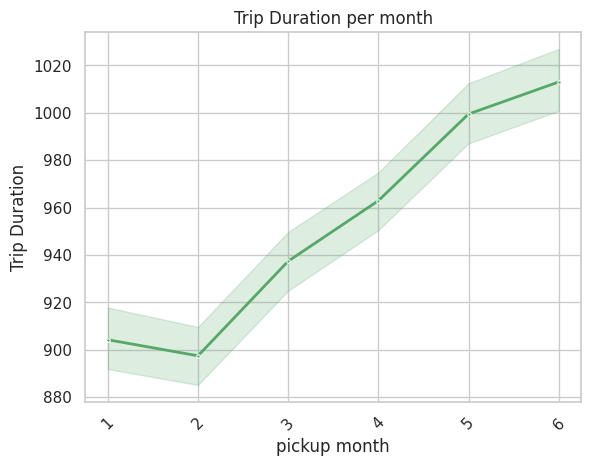

In [ ]:
sns.lineplot(x='pickup_month',y='trip_duration',data=data,marker='.',markersize=5,linewidth=2,color='g')
plt.xlabel('pickup month')
plt.ylabel('Trip Duration')
plt.title('Trip Duration per month')
plt.xticks(rotation=45)
plt.grid(True)



plt.show()

.From Febraury we can see that there is more rising per month

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_time_of_day,dropoff_time_of_day,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,3,3,0,0,17,17,evening,evening,1.502172
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,6,6,6,6,0,0,mid night,mid night,1.808660
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,1,1,1,1,11,12,morning,afternoon,6.379687
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,4,4,2,2,19,19,evening,evening,1.483632
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,3,3,5,5,13,13,afternoon,afternoon,1.187038


In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_time_of_day', 'dropoff_time_of_day',
       'distance'],
      dtype='object')

In [ ]:
data.dtypes

id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag             object
trip_duration                   int64
pickup_day                     object
dropoff_day                    object
pickup_month                    int64
dropoff_month                   int64
pickup_day_no                   int64
dropoff_day_no                  int64
pickup_hour                     int64
dropoff_hour                    int64
pickup_time_of_day             object
dropoff_time_of_day            object
distance                      float64
dtype: object

**Distance** **Per** **Vendor**



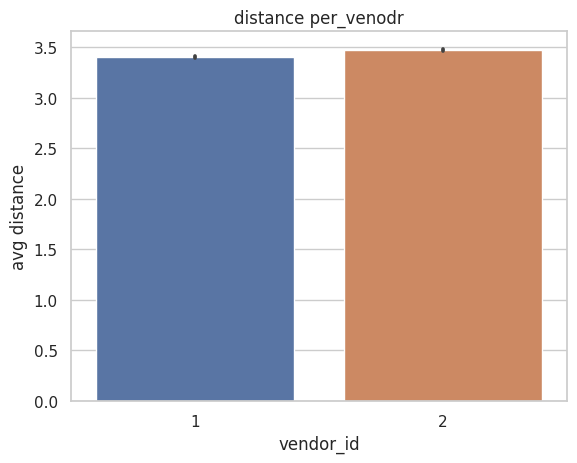

In [ ]:
sns.barplot(x='vendor_id',y='distance',data=data,estimator=np.mean)
plt.xlabel('vendor_id')
plt.ylabel("avg distance")
plt.title("distance per_venodr")
plt.show()

The distribution is very similar for both vendors

**Distance and store and forward flag**

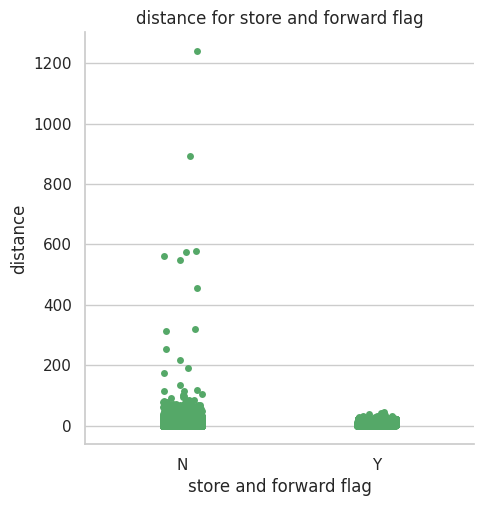

In [ ]:
sns.catplot(x='store_and_fwd_flag',y='distance',data=data,kind="strip",color='g')
plt.xlabel("store and forward flag")
plt.ylabel("distance")
plt.title("distance for store and forward flag")
plt.show()

We see that for longer distance the trip is not stored

**Distance and passenger count**

<ipython-input-77-fe801a972653>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='passenger_count',y='distance',data=data,kind="strip",palette=color_palette)
<ipython-input-77-fe801a972653>:2: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  sns.catplot(x='passenger_count',y='distance',data=data,kind="strip",palette=color_palette)


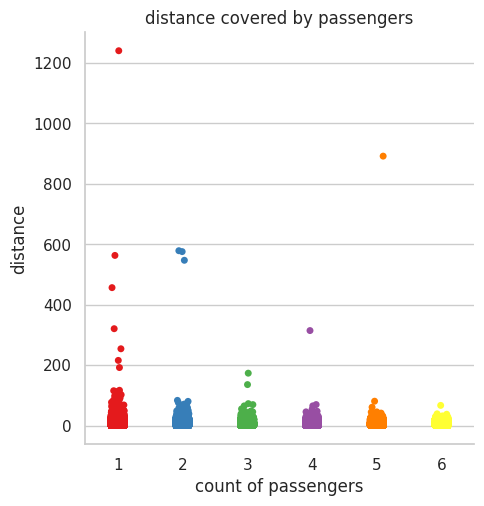

In [ ]:
color_palette=sns.color_palette("Set1")
sns.catplot(x='passenger_count',y='distance',data=data,kind="strip",palette=color_palette)
plt.xlabel("count of passengers")
plt.ylabel("distance")
plt.title("distance covered by passengers")
plt.show()

As we seen that longer distance are covered by eithe 1 or 2 4 passenger rides

**Distance Per Day of Week**

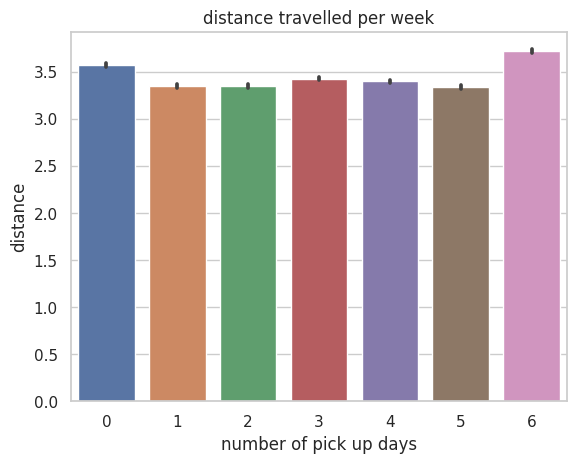

In [ ]:
sns.barplot(x='pickup_day_no',y='distance',data=data)
plt.xlabel("number of pick up days")
plt.ylabel("distance")
plt.title('distance travelled per week')
plt.show()

.Distance are longer on sundays because it is weekend

.Monday trips asr high in distance

.This probably means that there can be outstation trips on these days and or streets are busier

**Distance per hour of day**

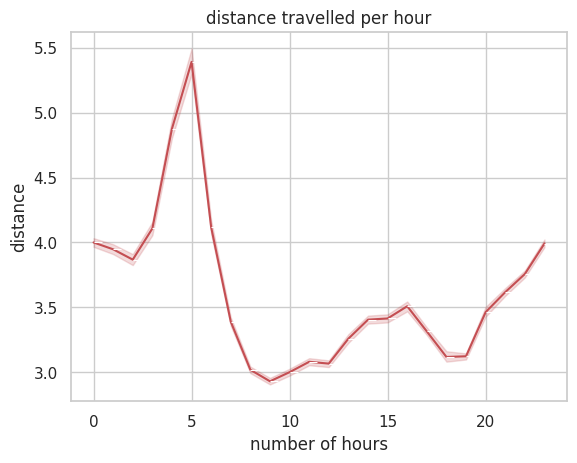

In [ ]:
sns.lineplot(x='pickup_hour',y='distance',data=data,marker=True,color='r')
plt.xlabel("number of hours")
plt.ylabel("distance")
plt.title("distance travelled per hour")
plt.show()

Distance are the longest around 5am

**Distance per time of day**

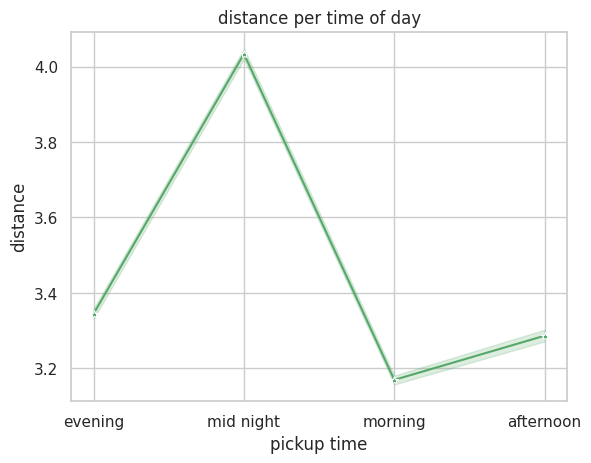

In [ ]:
sns.lineplot(x="pickup_time_of_day",y='distance',data=data,marker='*',color='g')
plt.xlabel("pickup time")
plt.ylabel("distance")
plt.title("distance per time of day")
plt.show()

.As we seen that distance are being longest during mid night it may be called as early morning too.

.This can probably when we go to outstation trips the people may be start at early morning

**Distance Per month**

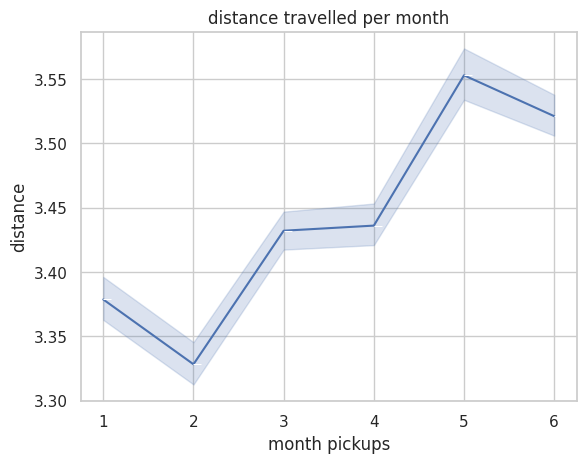

In [ ]:
sns.lineplot(x='pickup_month',y='distance',data=data,marker=True,color='b')
plt.xlabel("month pickups")
plt.ylabel("distance")
plt.title("distance travelled per month")
plt.show()

.As we seen in distance per month we can say that distance travelled is more in june and the lowest is febraury

**Passenger Count and Vendor_id**

<Axes: xlabel='vendor_id', ylabel='passenger_count'>

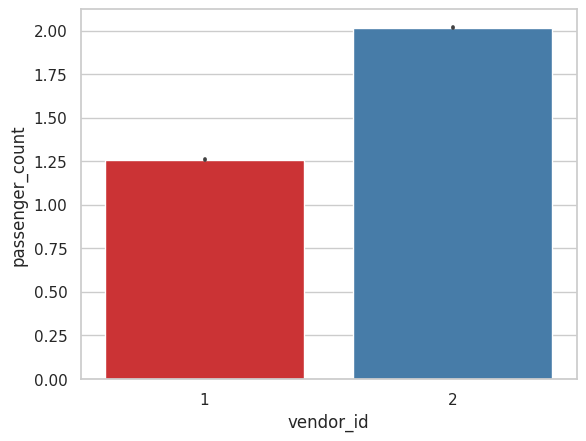

In [ ]:
color_palette=sns.color_palette("Set1")
sns.barplot(x='vendor_id',y='passenger_count',data=data,palette=color_palette)


.This shows that vendor_2 carries 2 passengers while vendor_1 carries 1 passengers.

let us see rows whose distance is 0

In [ ]:
data[data['distance']==0]['trip_duration'].head()

246      227
291     1109
407      947
702      580
1620      27
Name: trip_duration, dtype: int64

In [ ]:
data[data['distance']==0]['trip_duration'].tail()

1456399    1284
1456627     127
1456989     566
1457114     632
1457136     176
Name: trip_duration, dtype: int64

.We can see that trip duration is more when the distance is 0
.One reason can be thatdropoff coordinates weren't recorded.

.Another reason is that one can think that for short trip  duration,may be the passenger changed their mind and cancelled teh ride after some time.